# The MNIST 
* (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.
* The database is also widely used for training and testing in the field of machine learning.
* 60,000 training images and 10,000 testing images.

## Preparing the model

In [1]:
#Lets start with imports:)
import tensorflow as tf

# Import MINST data from tensorflow built in tutorials datasets
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### Data Format
The data is stored in a vector format, while the original data was a 2-dimensional matrix with values representing how much of a pigment was at a certain location.

In [2]:
type(mnist.train.images)

numpy.ndarray

In [3]:
type(mnist.train.images[10])

numpy.ndarray

In [4]:
len(mnist.train.images[12])

784

### Observations
Now that we know that minst.train.images in a n dimmentional array we can reshape sub arrays (images) to their original square shape
#### Lets test this

In [5]:
test = mnist.train.images[12].reshape(28,28)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

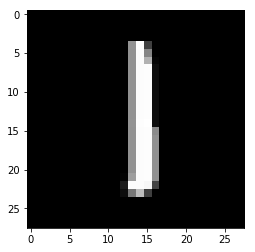

In [7]:
plt.imshow(test, cmap='gray')

Now we have pretty good idea what number is it :)

### Parameters

* Learning Rate - How quickly to adjust the cost function.
* Training Epochs - How many training cycles to go through
* Batch Size - Size of the 'batches' of training data

In [8]:
learning_rate = 0.001
training_epochs = 30
batch_size = 100

### Network Parameters

Here we have parameters which will directly define our Neural Network, these would be adjusted depending on what your data looked like and what kind of a net you would want to build. Basically just some numbers we will eventually use to define some variables later on in our model:

In [9]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
n_samples = mnist.train.num_examples

###  TensorFlow Graph Input

In [10]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

### MultiLayer Model

In [11]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### Weights and Bias


In [12]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [13]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [14]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)

### Cost and Optimization Functions

We'll use Tensorflow's built-in functions

In [15]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Training the Model

In [16]:
Xsamp, ysamp = mnist.train.next_batch(1)

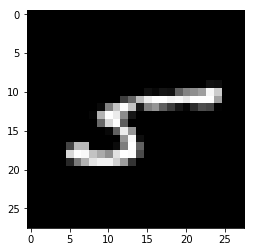

In [17]:
plt.imshow(Xsamp.reshape(28,28), cmap='gray')

### Running the Session


In [18]:
# Launch the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(tf.global_variables_initializer())

for generation in range(1, training_epochs + 1):
    # Compute average loss
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)

    for i in range(total_batch):

        batch_x, batch_y = mnist.train.next_batch(batch_size)

        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        avg_cost += c / total_batch

    print(f"Generation: {generation} cost={avg_cost:.4f}", end='\r')

print(f"Model has trained {training_epochs} epochs")

Model has trained 30 epochs


## Model Evaluations

Tensorflow comes with some built-in functions to help evaluate our model.

In [19]:
# Test model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In order to get a numerical value for our predictions we will need to use tf.cast to cast the Tensor of booleans back into a Tensor of Floating point values in order to take the mean of it.

In [20]:
correct_predictions = tf.cast(correct_predictions, "float")

Now we use the tf.reduce_mean function in order to grab the mean of the elements across the tensor.

In [21]:
accuracy = tf.reduce_mean(correct_predictions)

We still need to pass in our actual test data! Now we can call the MNIST test labels and images and evaluate our accuracy!

In [22]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9549


### After only 30 epochs we hot 95.5% accuracy :)